# Cx_Oracle musings...

various methods to reconstruct the data into python objects.  

## Setup

In [27]:
import os
import numpy as np
import platform
import pandas as pd
import cx_Oracle as odb
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import array

In [28]:
# working dir
if platform.system() == 'Windows':
    os.chdir(os.path.join(os.getenv('HOME'),'Documents', 'Development', 'dst', 'examples', 'abc_db'))
else:
    os.chdir(os.path.join(os.getenv('DST'),'examples', 'abc_db'))
print(os.getcwd())

# plots 
%matplotlib inline
np.set_printoptions(precision=4)
plt.rc('figure', figsize=(10, 8))

/Users/rwk7t/Development/dst/examples/abc_db


test connections:

In [29]:
# Build connection string
user     = "abc"
sid      = "XE" if platform.system()=='Windows' else "ORCL"
pswd     = "abc"
conn_str =" %s/%s@%s" % (user, pswd, sid)

# Connect to Oracle and test
conn = odb.connect(user, pswd, sid)
if (conn):
    print("Connection successful")
    print(conn.version)
else:
    print("Connection not successful")

conn.close()

Connection successful
12.1.0.2.0


## test image blob

In [30]:
#%%timeit -n 1
try:
    conn = odb.connect(user, pswd, sid)
    sql = """
select
    t.pic1.ndim
  , t.pic1.dim1
  , t.pic1.dim2
  , t.pic1.dim3
  , t.pic1.value
from teams t
where name='team2'
"""
        
    cursor = conn.cursor()
    cursor.execute(sql)
    record = cursor.fetchone()
    print(record)
    
except odb.DatabaseError, exc:
    print(exc)
finally:
    cursor.close()

(3, 183, 275, 3, <cx_Oracle.LOB object at 0x10466b0d0>)


In [35]:
#%%timeit -n 1
ndim   = record[0]
dim1   = record[1]
dim2   = record[2]
dim3   = record[3]
blob   = record[4]
blob_image = np.array(array.array('B', blob.read()), dtype=np.uint8).reshape((dim1, dim2, dim3))
blob_image.shape

(183, 275, 3)

(183, 275, 3)
150975
150975


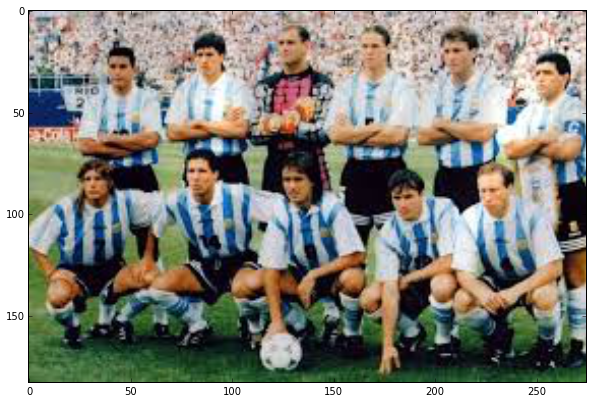

In [36]:
plt.imshow(blob_image)
print(blob_image.shape)
print(blob_image.size)
print(dim1*dim2*dim3)

## OBJECT parsing

In [47]:
conn = odb.connect(user, pswd, sid)    

In [48]:
sql = "select t.pic1 from teams t where name='team2'"       
cursor = conn.cursor()
cursor.execute(sql)
record = cursor.fetchone()

In [49]:
obj = record[0]
obj

In [50]:
obj.type, obj.DTYPE, obj.NDIM, obj.DIM1, obj.DIM2, obj.DIM3, obj.AVG, obj.STD

(<cx_Oracle.ObjectType ABC.ARRAYINFO>,
 'uint8',
 3.0,
 183.0,
 275.0,
 3.0,
 120.24470276535901,
 74.2968264794106)

In [51]:
obj.NDIM

3.0

In [55]:
obj.VALUE.type

NotSupportedError: ExternalObjectVar_GetAttributeValue(): unhandled data type 113

In [46]:
obj.type.attributes

[<cx_Oracle.ObjectAttribute AVG>,
 <cx_Oracle.ObjectAttribute STD>,
 <cx_Oracle.ObjectAttribute NDIM>,
 <cx_Oracle.ObjectAttribute DIM1>,
 <cx_Oracle.ObjectAttribute DIM2>,
 <cx_Oracle.ObjectAttribute DIM3>,
 <cx_Oracle.ObjectAttribute DIM4>,
 <cx_Oracle.ObjectAttribute DTYPE>,
 <cx_Oracle.ObjectAttribute VALUE>]

### DB tests...

#### Close Connection

In [59]:
conn.close()